## Question 9.3

Considere  o  problema  de  classificação  de  padrões  constituído  neste  caso  de  oito  padrões.  A  distribuição  dos  padrões  forma  um  círculo  centrado  na  origem  de  raio  unitário  e contido  no  círculo  um  losango  também  centrado na origem, com lados iguais a raiz de 2. Os dados das classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro  classes  correspondem  aos  setores  delimitados  pelo  circulo  e  os  lados  do  losango. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os padrões associados a cada uma das classes. Verifique o desempenho do classi-ficador usando o conjunto de validação e calculando a matriz de confusão. 

### Import Libraries

In [23]:
import torch
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import OrderedDict
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Generating Data

In [2]:
def circle(x,y):
    return x**2 + y**2

def straight_1(x,y):
    return x + y

def straight_2(x,y):
    return - x + y

def straight_3(x,y):
    return - x - y

def straight_4(x,y):
    return x - y

In [3]:
# generate the data
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)

x,y = np.meshgrid(x,y)

points = np.vstack(list(zip(x.ravel(), y.ravel())))

In [4]:
# label data
labels = []

for i,j in points:
    if circle(i,j) >= 1:
        labels.append(0)
    elif i >= 0 and j >= 0:
        if straight_1(i,j) <= 1:
            labels.append(1)
        else:
            labels.append(5)
    elif i < 0 and j >= 0:
        if straight_2(i,j) <= 1:
            labels.append(2)
        else:
            labels.append(6)
    elif i < 0 and j < 0:
        if straight_3(i,j) <= 1:
            labels.append(3)
        else:
            labels.append(7)
    elif i >= 0 and j < 0:
        if straight_4(i,j) <= 1:
            labels.append(4)
        else:
            labels.append(8)

labels = np.array(labels)

### Train Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

print(f"shape x train: {x_train.shape}")
print(f"shape y train: {y_train.shape}")
print(f"shape x test: {x_test.shape}")
print(f"shape y test: {y_test.shape}")

shape x train: (32000, 2)
shape y train: (32000,)
shape x test: (8000, 2)
shape y test: (8000,)


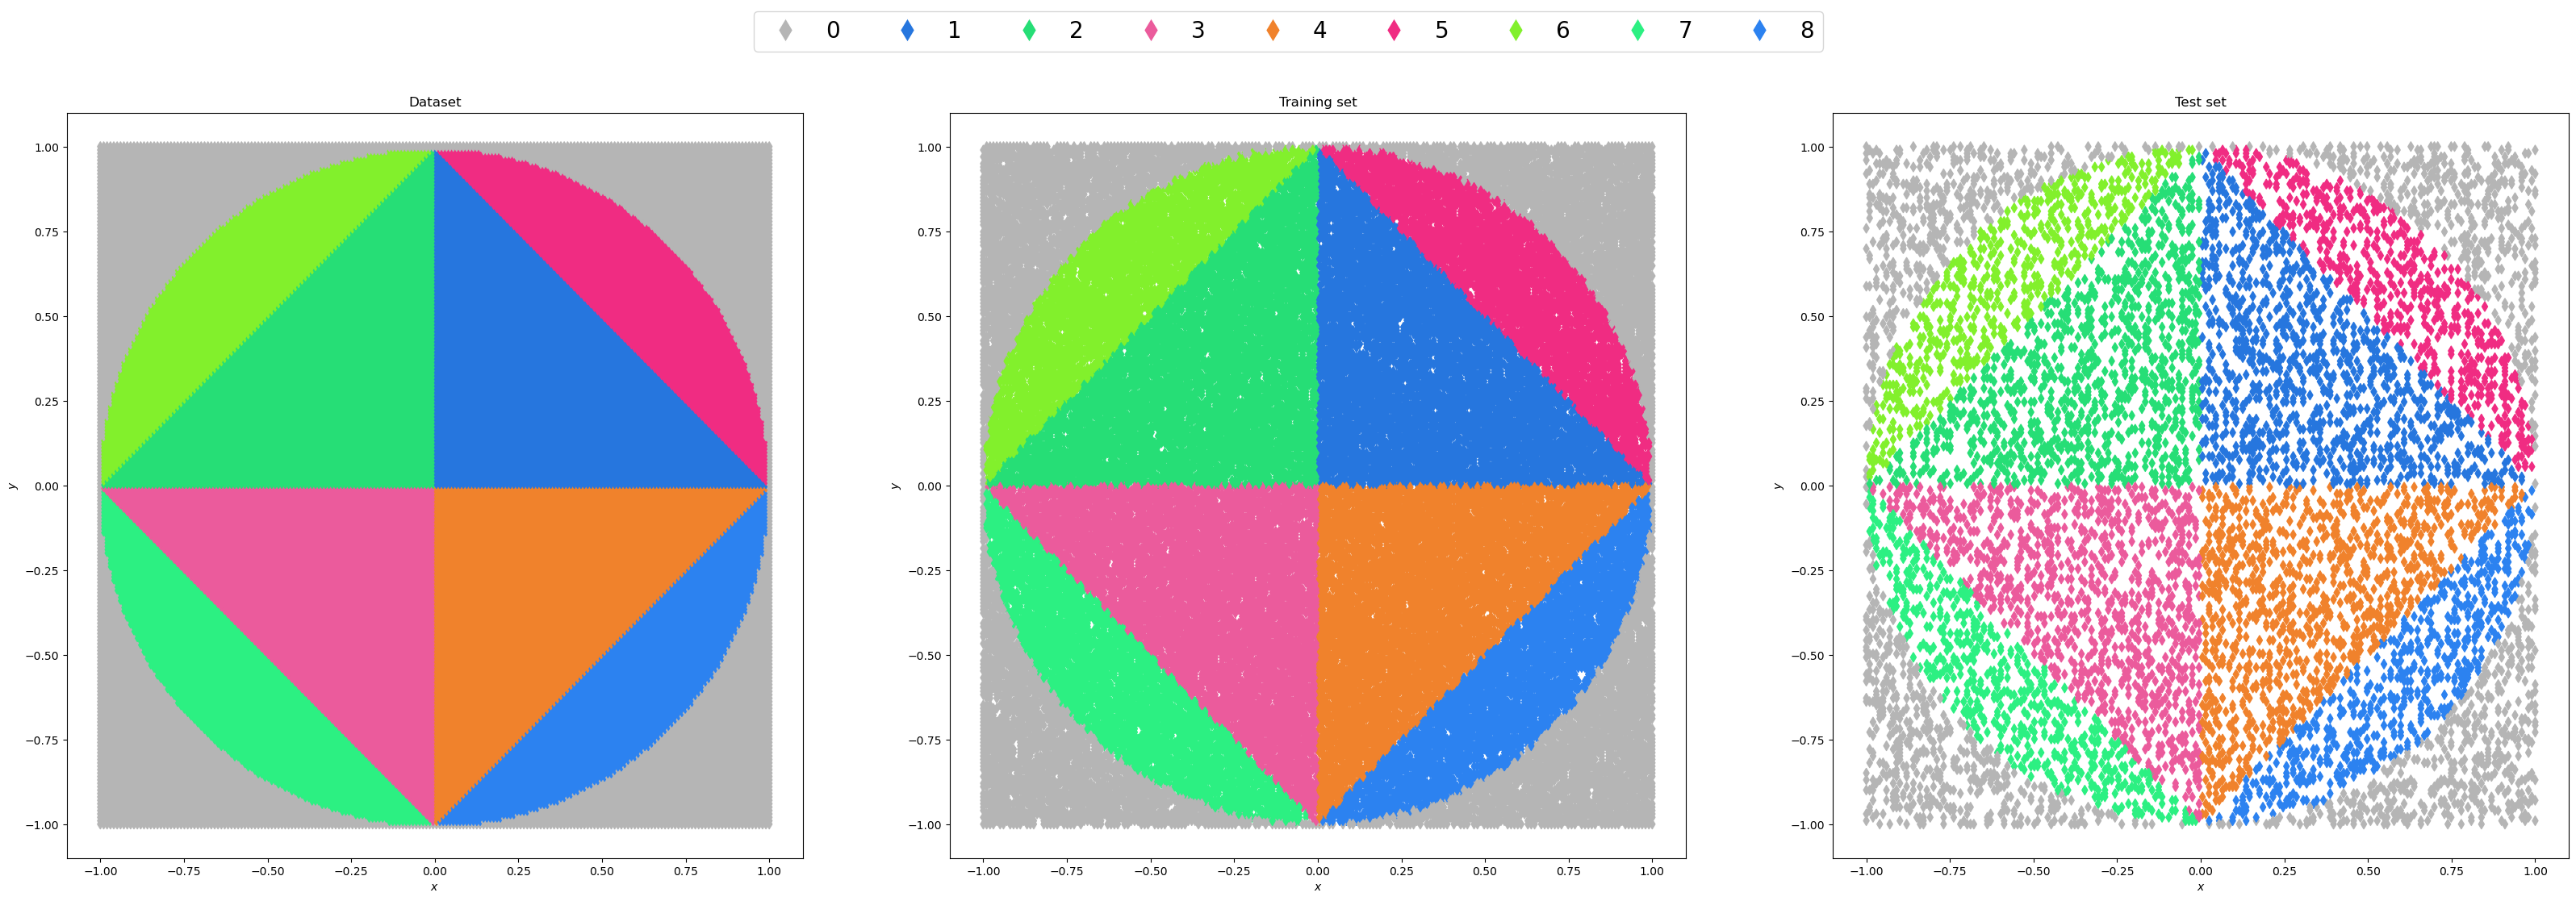

In [24]:
# plot scatter points of the data by label

fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (38/255, 118/255, 222/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (235/255, 91/255, 156/255, 1.0)
color5 = (240/255, 130/255, 44/255, 1.0)
color6 = (240/255, 44/255, 130/255, 1.0)
color7 = (130/255, 240/255, 44/255, 1.0)
color8 = (44/255, 240/255, 130/255, 1.0)
color9 = (44/255, 130/255, 240/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5, color6, color7, color8, color9])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

legend_elements = [
    Line2D([0], [0], marker='d', color='w', label='Class 1', markerfacecolor=color1, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 2', markerfacecolor=color2, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 3', markerfacecolor=color3, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 4', markerfacecolor=color4, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 5', markerfacecolor=color5, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 6', markerfacecolor=color6, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 7', markerfacecolor=color7, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 8', markerfacecolor=color8, markersize=15),
    Line2D([0], [0], marker='d', color='w', label='Class 9', markerfacecolor=color9, markersize=15)
]

fig.legend(legend_elements, ['0', '1', '2', '3', '4', '5', '6', '7', '8'], loc='upper center', ncol=9, fontsize=20)

plt.show()

### Transforming dataset to Tensors

In [7]:
# transform to tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

# create the dataloaders
train_dataloader = DataLoader(list(zip(x_train, y_train)), batch_size=32, shuffle=True)
test_dataloader = DataLoader(list(zip(x_test, y_test)), batch_size=32, shuffle=True)

### Define the model

In [73]:
def get_model_9_3(device):
    model = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(2, 512)),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(512, 256)),
        ('relu2', nn.ReLU()),
        ('fc3', nn.Linear(256, 128)),
        ('relu3', nn.ReLU()),
        ('fc4', nn.Linear(128, 64)),
        ('relu4', nn.ReLU()),
        ('fc5', nn.Linear(64, 32)),
        ('relu5', nn.ReLU()),
        ('fc6', nn.Linear(32, 16)),
        ('relu6', nn.ReLU()),
        ('fc7', nn.Linear(16, 9)),
        ('softmax', nn.Softmax(dim=1))
    ])).to(device)
    return model

In [74]:
# def get_model_9_3(device):
#     model = nn.Sequential(OrderedDict([
#         ('fc1', nn.Linear(2, 128)),
#         ('relu1', nn.ReLU()),
#         ('fc2', nn.Linear(128, 64)),
#         ('relu2', nn.ReLU()),
#         ('fc3', nn.Linear(64, 32)),
#         ('relu3', nn.ReLU()),
#         ('fc4', nn.Linear(32, 9)),
#         # ('relu4', nn.ReLU()),
#         # ('fc5', nn.Linear(16, 9)),
#         ('softmax', nn.Softmax(dim=1))
#     ])).to(device)
#     return model

In [87]:
# get model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_9_3 = get_model_9_3(device)

# check num of parameters
print(f"Number of parameters: {sum(p.numel() for p in model_9_3.parameters())}")

Number of parameters: 176777


In [88]:
# define loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model_9_3.parameters(), lr=0.0001)

In [89]:
def train(model_9_3, train_dataloader, test_dataloader, criterion, optimizer, epochs=10):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        train_loss = 0
        test_loss = 0
        train_acc = 0
        test_acc = 0

        model_9_3.train()
        for x, y in train_dataloader:
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred = model_9_3(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()

        model_9_3.eval()
        with torch.no_grad():
            for x, y in test_dataloader:
                x = x.to(device)
                y = y.to(device)

                y_pred = model_9_3(x)
                loss = criterion(y_pred, y)

                test_loss += loss.item()
                test_acc += (y_pred.argmax(dim=1) == y).sum().item()

        train_loss /= len(train_dataloader.dataset)
        test_loss /= len(test_dataloader.dataset)
        train_acc /= len(train_dataloader.dataset)
        test_acc /= len(test_dataloader.dataset)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        print(f"Epoch: {epoch+1}/{epochs}.. "
              f"Train loss: {train_loss:.3f}.. "
              f"Test loss: {test_loss:.3f}.. "
              f"Train accuracy: {train_acc:.3f}.. "
              f"Test accuracy: {test_acc:.3f}")

    return train_losses, test_losses, train_accs, test_accs

In [90]:
train_losses, test_losses, train_accs, test_accs = train(model_9_3, train_dataloader, 
                                                         test_dataloader, criterion,
                                                         optimizer, epochs=15)

Epoch: 1/15.. Train loss: 0.064.. Test loss: 0.055.. Train accuracy: 0.321.. Test accuracy: 0.676
Epoch: 2/15.. Train loss: 0.053.. Test loss: 0.051.. Train accuracy: 0.727.. Test accuracy: 0.753
Epoch: 3/15.. Train loss: 0.051.. Test loss: 0.051.. Train accuracy: 0.757.. Test accuracy: 0.755
Epoch: 4/15.. Train loss: 0.051.. Test loss: 0.051.. Train accuracy: 0.762.. Test accuracy: 0.767
Epoch: 5/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.766.. Test accuracy: 0.774
Epoch: 6/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.768.. Test accuracy: 0.770
Epoch: 7/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.769.. Test accuracy: 0.775
Epoch: 8/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.770.. Test accuracy: 0.773
Epoch: 9/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.770.. Test accuracy: 0.769
Epoch: 10/15.. Train loss: 0.050.. Test loss: 0.050.. Train accuracy: 0.772.. Test accuracy: 0.775
Epoch: 11/15.. Trai

### Evaluation

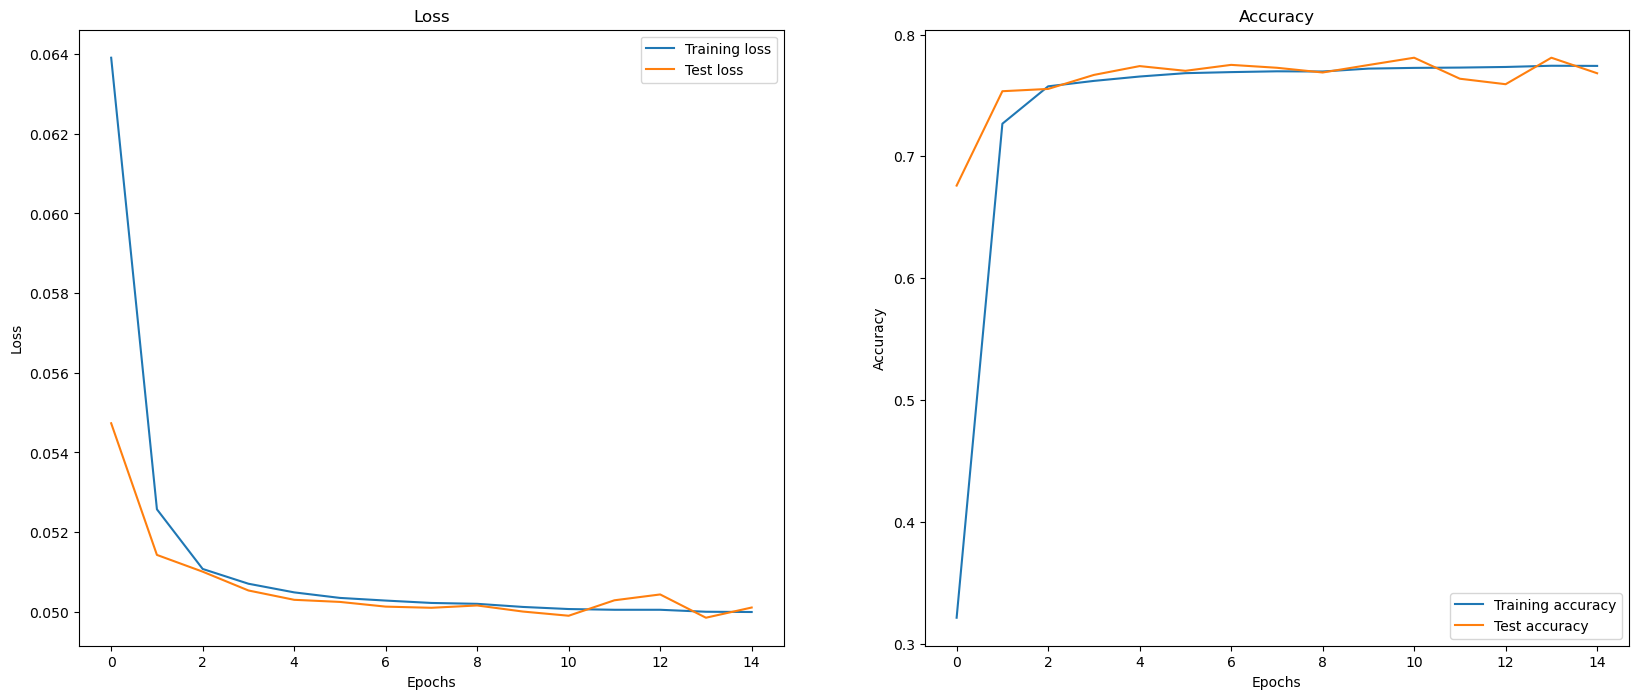

In [91]:
# plot loss and accuracy in two subplots
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].plot(train_losses, label='Training loss')
ax[0].plot(test_losses, label='Test loss')
ax[0].set(
    title='Loss',
    xlabel='Epochs',
    ylabel='Loss'
)
ax[0].legend()

ax[1].plot(train_accs, label='Training accuracy')
ax[1].plot(test_accs, label='Test accuracy')
ax[1].set(
    title='Accuracy',
    xlabel='Epochs',
    ylabel='Accuracy'
)

ax[1].legend()
plt.show()

In [92]:
y_pred = model_9_3(x_test.to(device))
y_pred = y_pred.argmax(dim=1).cpu().numpy()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      1788
           1       0.80      0.95      0.87       990
           2       0.68      0.98      0.80       990
           3       0.95      1.00      0.97       990
           4       0.76      0.99      0.86       990
           5       0.00      0.00      0.00       563
           6       0.00      0.00      0.00       563
           7       0.91      0.95      0.93       563
           8       0.00      0.00      0.00       563

    accuracy                           0.77      8000
   macro avg       0.53      0.65      0.58      8000
weighted avg       0.61      0.77      0.68      8000



/home/morsinaldo/anaconda3/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/morsinaldo/anaconda3/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/morsinaldo/anaconda3/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

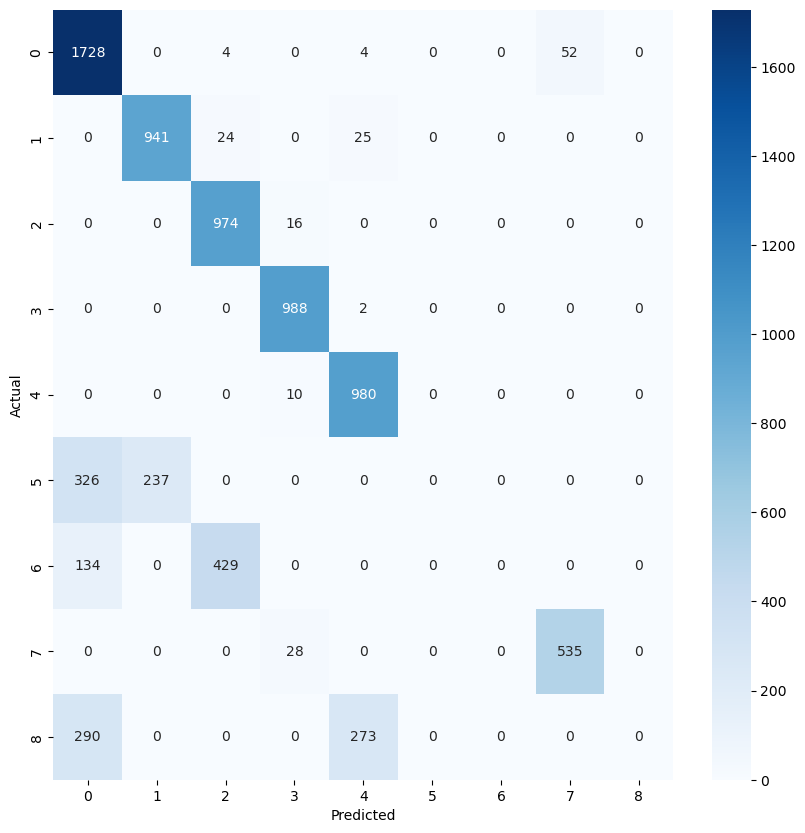

In [93]:
# plooting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()